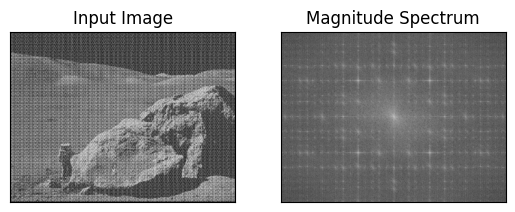

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
#Filter creating
# Low pass filter
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

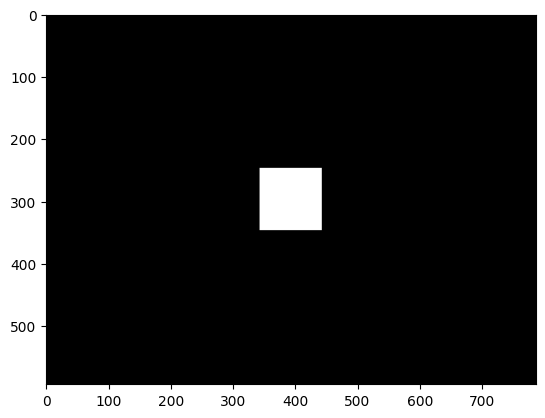

In [3]:
plt.imshow(mask[:,:,0], cmap = 'gray')

In [4]:
# Filtering
dft_shift = dft_shift*mask

C:\Users\shken\AppData\Local\Temp\ipykernel_31076\3830399572.py:1: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


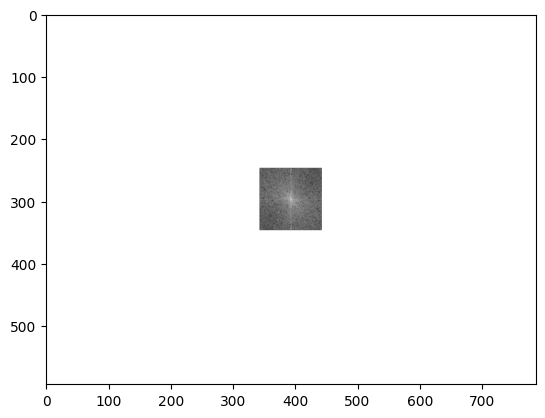

In [5]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

In [6]:
#fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

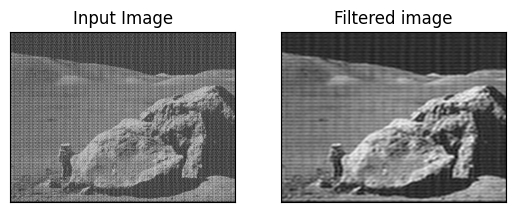

In [7]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

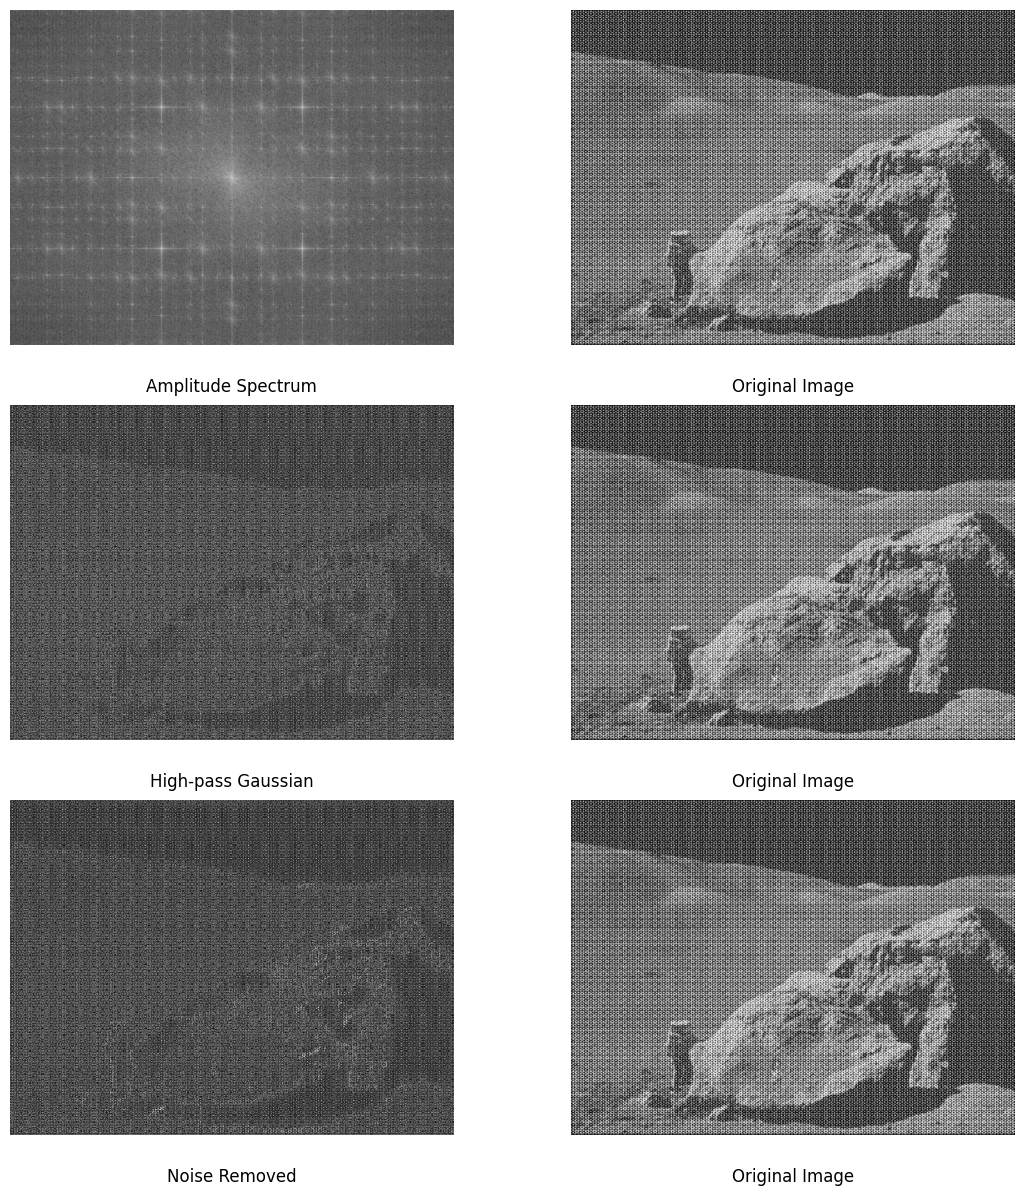

In [12]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

# DFT
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

rows, cols = img.shape
crow, ccol = rows//2 , cols//2
sigma = 30
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
D = np.sqrt((X-ccol)**2 + (Y-crow)**2)
gaussian_low = np.exp(-(D**2)/(2*sigma**2))
high_pass_mask = 1 - gaussian_low
high_pass_mask = np.repeat(high_pass_mask[:, :, np.newaxis], 2, axis=2)
dft_shift_high = dft_shift * high_pass_mask
f_ishift_high = np.fft.ifftshift(dft_shift_high)
img_high = cv.idft(f_ishift_high)
img_high = cv.magnitude(img_high[:,:,0], img_high[:,:,1])

mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-10:crow+10, ccol-10:ccol+10,:] = 0
dft_shift_clean = dft_shift * mask
f_ishift_clean = np.fft.ifftshift(dft_shift_clean)
img_clean = cv.idft(f_ishift_clean)
img_clean = cv.magnitude(img_clean[:,:,0], img_clean[:,:,1])

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0,0].imshow(magnitude_spectrum, cmap='gray')
axes[0,0].axis('off')
axes[0,0].text(0.5, -0.1, "Amplitude Spectrum", ha='center', va='top', transform=axes[0,0].transAxes, fontsize=12)
axes[0,1].imshow(img, cmap='gray')
axes[0,1].axis('off')
axes[0,1].text(0.5, -0.1, "Original Image", ha='center', va='top', transform=axes[0,1].transAxes, fontsize=12)

axes[1,0].imshow(img_high, cmap='gray')
axes[1,0].axis('off')
axes[1,0].text(0.5, -0.1, "High-pass Gaussian", ha='center', va='top', transform=axes[1,0].transAxes, fontsize=12)
axes[1,1].imshow(img, cmap='gray')
axes[1,1].axis('off')
axes[1,1].text(0.5, -0.1, "Original Image", ha='center', va='top', transform=axes[1,1].transAxes, fontsize=12)

axes[2,0].imshow(img_clean, cmap='gray')
axes[2,0].axis('off')
axes[2,0].text(0.5, -0.1, "Noise Removed", ha='center', va='top', transform=axes[2,0].transAxes, fontsize=12)
axes[2,1].imshow(img, cmap='gray')
axes[2,1].axis('off')
axes[2,1].text(0.5, -0.1, "Original Image", ha='center', va='top', transform=axes[2,1].transAxes, fontsize=12)

plt.tight_layout()
plt.show()


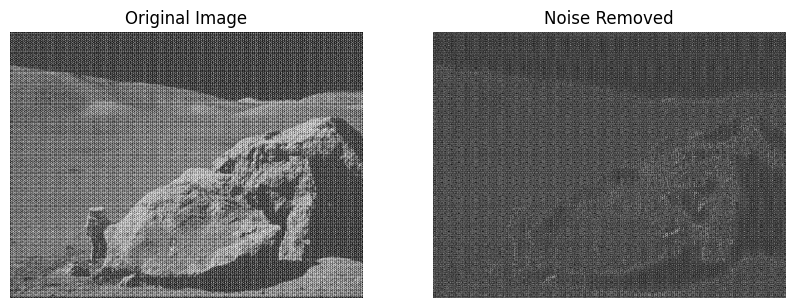

In [14]:
# Реализуйте удаление периодического шума
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask = np.ones((rows, cols, 2), np.uint8)

mask[crow-10:crow+10, ccol-10:ccol+10, :] = 0
dft_shift_filtered = dft_shift * mask

f_ishift = np.fft.ifftshift(dft_shift_filtered)
img_clean = cv.idft(f_ishift)
img_clean = cv.magnitude(img_clean[:,:,0], img_clean[:,:,1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(img_clean, cmap='gray')
plt.axis('off')
plt.title("Noise Removed")
plt.show()
